In [1]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [2]:
from tensorflow.keras.datasets import boston_housing

# Load dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (404, 13)
Test data shape: (102, 13)


In [3]:
#DATA PREPROCESSING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [4]:
import pandas as pd

column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

df = pd.DataFrame(x_train, columns=column_names)
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.055261e-16,-1.319077e-17,1.789548e-15,-3.077846e-17,-5.219147e-15,6.404118e-15,2.682123e-16,5.452184e-16,0.000000,-1.802738e-16,2.366864e-14,6.045769e-15,6.199661e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-0.971569,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-0.626249,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-0.511142,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,  # 20% of training data for validation
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 594.0898 - mae: 22.2086 - val_loss: 600.9842 - val_mae: 22.6420
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 517.1143 - mae: 20.7776 - val_loss: 561.0563 - val_mae: 21.6968
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 506.8957 - mae: 20.1118 - val_loss: 507.8680 - val_mae: 20.4183
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 434.9298 - mae: 18.1487 - val_loss: 434.7691 - val_mae: 18.5456
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 365.7699 - mae: 16.4290 - val_loss: 342.0677 - val_mae: 16.1221
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 263.5067 - mae: 13.6739 - val_loss: 240.1190 - val_mae: 13.0765
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 166.0668 - mae: 10.4871 - val_loss: 152.1003 - val_mae: 9.6868
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 107.4622 - mae: 8.2417 - val_loss: 99.9318 - val_mae: 7.6991
Epoch 9/100
11/11 

In [7]:
loss, mae = model.evaluate(x_test, y_test)
print("Mean Squared Error on test set:", loss)
print("Mean Absolute Error on test set:", mae)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.1805 - mae: 3.0122 
Mean Squared Error on test set: 24.620044708251953
Mean Absolute Error on test set: 3.222405433654785


In [8]:
#MAKE PREDICTIONS
y_pred = model.predict(x_test)
print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual Values:", y_test[:5])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
First 5 Predictions: [[ 8.797076]
 [17.228277]
 [20.278738]
 [31.944775]
 [24.700027]]
First 5 Actual Values: [ 7.2 18.8 19.  27.  22.2]


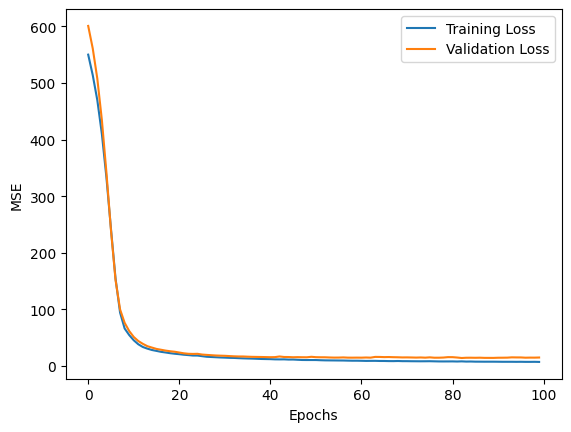

In [9]:
#VISUALIZATION
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()
